# House Price Prediction from [the kaggle competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
- Implemented by R

# Exploratory

In [1]:
df = read.csv(file = "train.csv")
library(repr)

### Filter cols into contributing features and check Nan Data
- This competition was already tried by Python before
- Hence, useful features have been known as below;

In [2]:
# features for train
tgt = c("OverallQual", "YearBuilt", "YearRemodAdd", "X1stFlrSF", "SalePrice" )
# filter
df = df[, tgt]
# check size, type and Nan values
print(paste("Row size:", nrow(df)))
print(paste("Col size:", ncol(df)))
sapply(df, class)
head(df)
sapply(df, function(x) sum(is.na(x)))

[1] "Row size: 1460"
[1] "Col size: 5"


OverallQual    YearBuilt YearRemodAdd    X1stFlrSF    SalePrice 
   "integer"    "integer"    "integer"    "integer"    "integer"

OverallQual,YearBuilt,YearRemodAdd,X1stFlrSF,SalePrice
7,2003,2003,856,208500
6,1976,1976,1262,181500
7,2001,2002,920,223500
7,1915,1970,961,140000
8,2000,2000,1145,250000
5,1993,1995,796,143000


OverallQual    YearBuilt YearRemodAdd    X1stFlrSF    SalePrice 
           0            0            0            0            0

### See all relationships
- Ensure each variable has a linear relationships with SalesPrice to use a linear regression

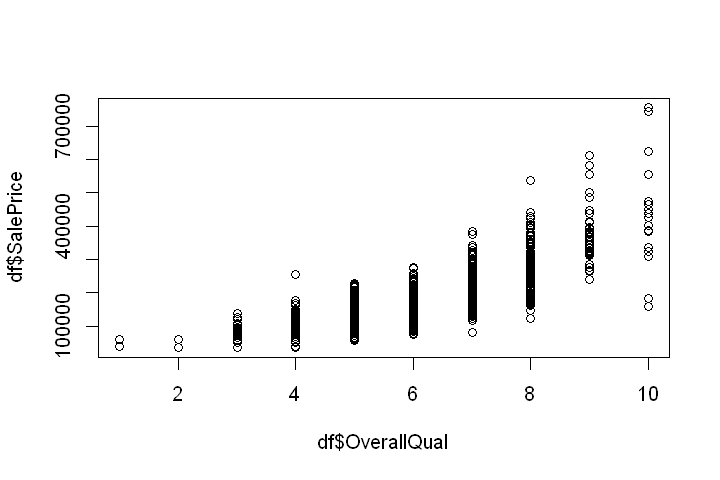

In [3]:
options(repr.plot.width=6, repr.plot.height=4, scipen=5)
plot(df$OverallQual, df$SalePrice)

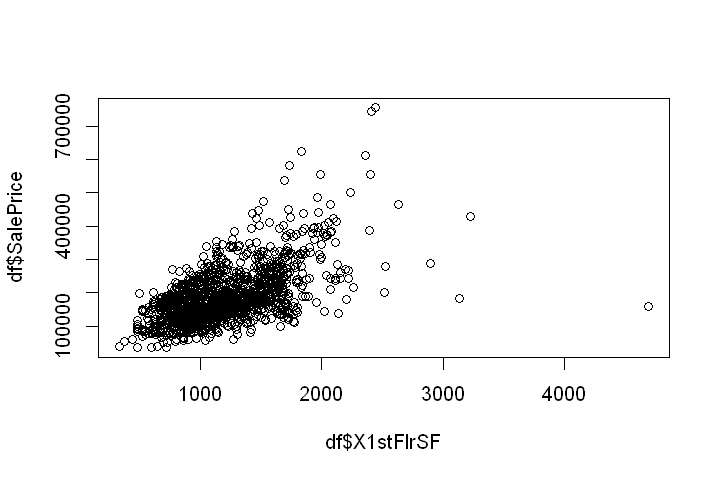

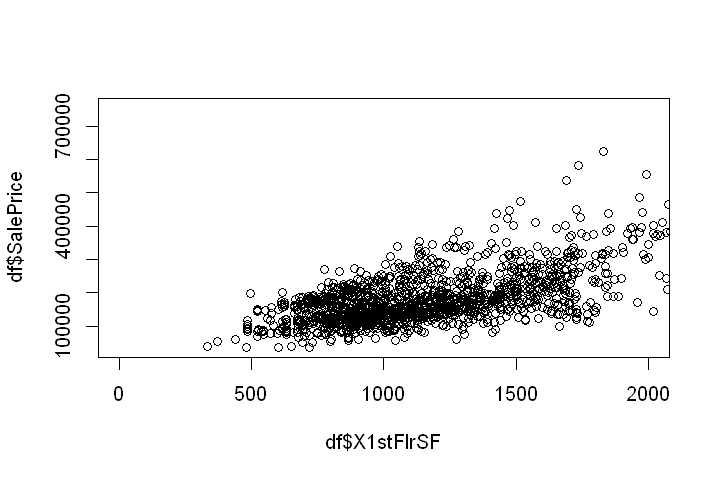

In [4]:
plot(df$X1stFlrSF, df$SalePrice)
plot(df$X1stFlrSF, df$SalePrice, xlim = c(0,2000))

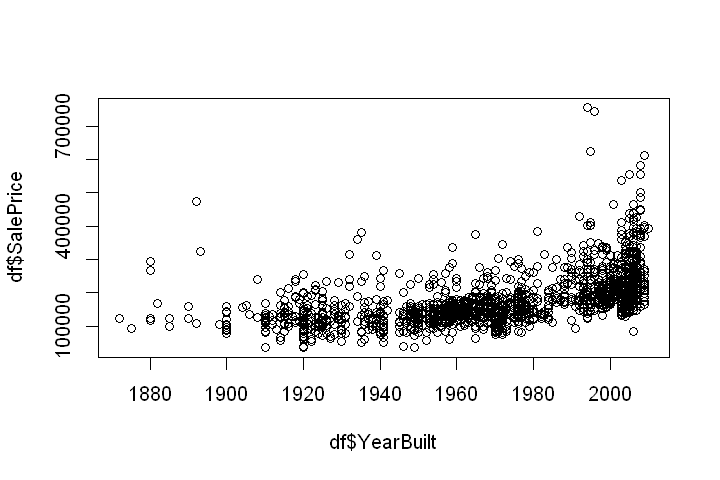

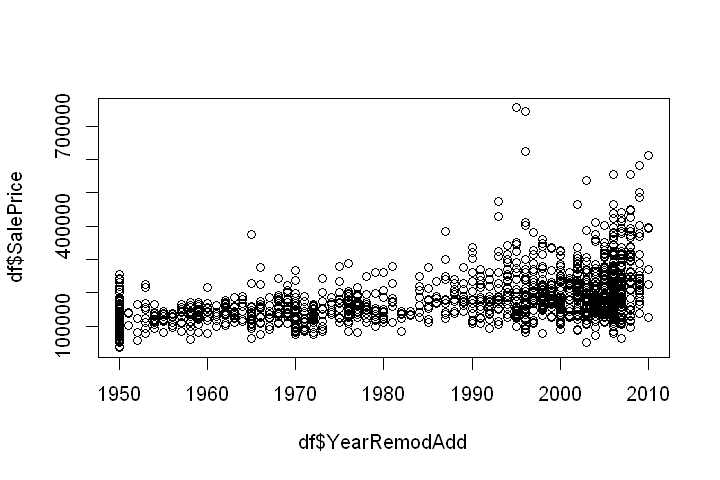

In [5]:
options(repr.plot.width=6, repr.plot.height=4, scipen=5)
plot(df$YearBuilt, df$SalePrice)
plot(df$YearRemodAdd, df$SalePrice)


# Data Processing
## Convert YearRemodAdd
YearRemodAdd has two unique features
1. Minimum val is 1950
1. Many records hold this value (1950)

It leads the assumptions below
1. The variable of YearRemodAdd has been collected since 1950
2. YearRemodAdd was uniformly filled with 1950 when this variable was added

If not renovated, YearRemodAdd should be equal with YearBuilt.

Hence, the value of 1950 in YearRemodAdd will convert into YearBuilt.

In [6]:
# Check the target for converting
length(which(df$YearRemodAdd == 1950 & df$YearBuilt != 1950))

# Convert
df[df$YearRemodAdd == 1950, "YearRemodAdd"] = df[which(df$YearRemodAdd == 1950), "YearBuilt"]

# Check that # of target is zero
length(which(df$YearRemodAdd == 1950 & df$YearBuilt != 1950))

[1] 166

[1] 0

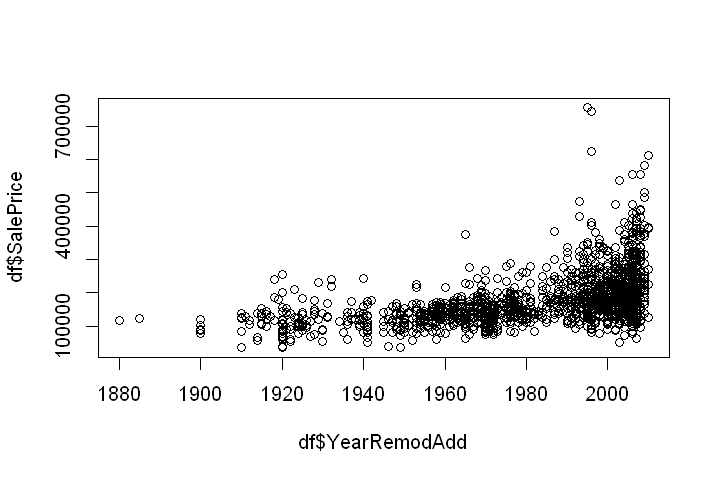

In [7]:
# Check the plot again after converting
options(repr.plot.width=6, repr.plot.height=4, scipen=5)
plot(df$YearRemodAdd, df$SalePrice)

## Check Outliers
### Sale Price
- see data over 500,000 as outliers

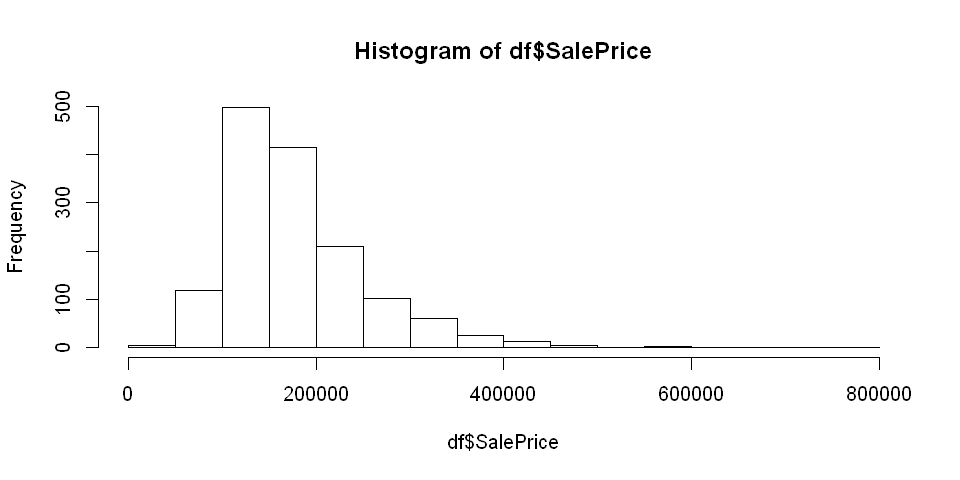

In [8]:
options(repr.plot.width=8, repr.plot.height=4, scipen=5)
hist(df$SalePrice)
# It will be applied to remove outliears
# df = df[df$SalePrice >= 50000 & df$SalePrice <= 500000, ]

### X1stFlrSF
- See data with X1stFlrSF over 2,200 as outliers

$breaks
 [1]  200  400  600  800 1000 1200 1400 1600 1800 2000 2200 2400 2600 2800 3000
[16] 3200 3400 3600 3800 4000 4200 4400 4600 4800

$counts
 [1]   2  31 180 371 314 203 157 122  40  23   7   5   1   1   1   1   0   0   0
[20]   0   0   0   1

$density
 [1] 0.000006849315 0.000106164384 0.000616438356 0.001270547945 0.001075342466
 [6] 0.000695205479 0.000537671233 0.000417808219 0.000136986301 0.000078767123
[11] 0.000023972603 0.000017123288 0.000003424658 0.000003424658 0.000003424658
[16] 0.000003424658 0.000000000000 0.000000000000 0.000000000000 0.000000000000
[21] 0.000000000000 0.000000000000 0.000003424658

$mids
 [1]  300  500  700  900 1100 1300 1500 1700 1900 2100 2300 2500 2700 2900 3100
[16] 3300 3500 3700 3900 4100 4300 4500 4700

$xname
[1] "df$X1stFlrSF"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

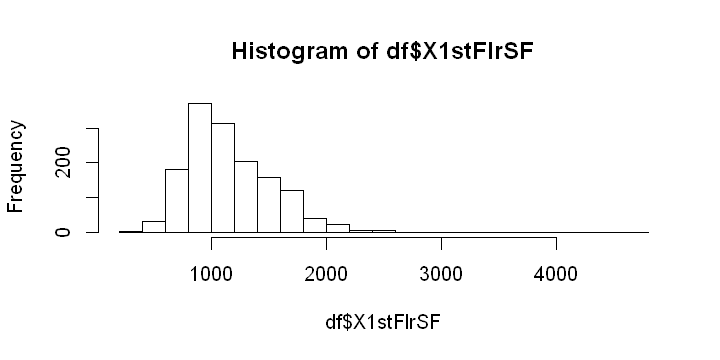

In [9]:
options(repr.plot.width=6, repr.plot.height=3, scipen=5)
res_hist_lot = hist(df$X1stFlrSF, breaks = 20)
res_hist_lot
# It will be applied to remove outliers
# df = df[df$X1stFlrSF >= 200 & df$X1stFlrSF <= 2200, ]


$breaks
 [1]      0  50000 100000 150000 200000 250000 300000 350000 400000 450000
[11] 500000 550000 600000 650000 700000 750000 800000

$counts
 [1]   5 118 496 414 210 102  61  26  14   5   2   3   2   0   1   1

$density
 [1] 0.00000006849315 0.00000161643836 0.00000679452055 0.00000567123288
 [5] 0.00000287671233 0.00000139726027 0.00000083561644 0.00000035616438
 [9] 0.00000019178082 0.00000006849315 0.00000002739726 0.00000004109589
[13] 0.00000002739726 0.00000000000000 0.00000001369863 0.00000001369863

$mids
 [1]  25000  75000 125000 175000 225000 275000 325000 375000 425000 475000
[11] 525000 575000 625000 675000 725000 775000

$xname
[1] "df$SalePrice"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

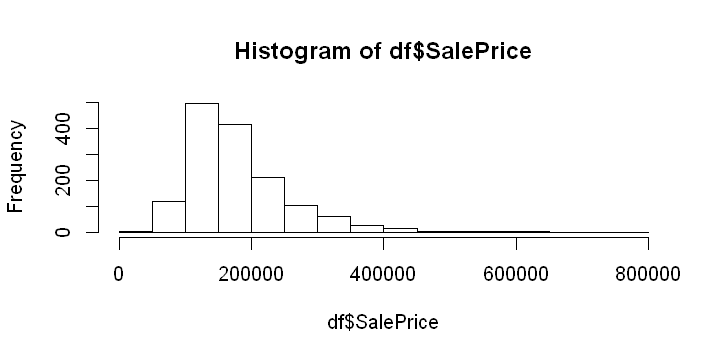

In [10]:
res_hist_price = hist(df$SalePrice)
res_hist_price
# df = df[df$SalePrice >= 50000 & df$SalePrice <= 300000]

## Remove Outliers

In [11]:
df = df[df$SalePrice >= 50000 & df$SalePrice <= 500000, ]
df = df[df$X1stFlrSF >= 200 & df$X1stFlrSF <= 2200, ]
df = df[df$SalePrice >= 50000 & df$SalePrice <= 300000, ]

## Check correlations
- Each variable has from strong to normal correlation with SalePrice

In [12]:
 sapply(df, function(x) cor.test(x, df$SalePrice))["estimate", ]

$OverallQual
      cor 
0.7586068 

$YearBuilt
      cor 
0.5684666 

$YearRemodAdd
      cor 
0.5149553 

$X1stFlrSF
     cor 
0.503838 

$SalePrice
cor 
  1

## Standardization

In [13]:
train_cols = c("OverallQual", "YearBuilt", "YearRemodAdd", "X1stFlrSF")
test_col = c("SalePrice" )

df[, train_cols] = scale(df[, train_cols])
head(df)

OverallQual,YearBuilt,YearRemodAdd,X1stFlrSF,SalePrice
0.93012773,1.1334743,0.8550490,-0.7891024,208500
0.08966608,0.2293667,-0.1899754,0.4885104,181500
0.93012773,1.0665034,0.8163444,-0.5877053,223500
0.93012773,-1.8132470,-0.4222030,-0.4586853,140000
1.77058939,1.0330179,0.7389352,0.1203314,250000
-0.75079557,0.7986196,0.5454122,-0.9779122,143000


## Cross Validation
- Split data into 7:3

In [14]:
set.seed(0)
row_num = nrow(df)
train_idx = sample(row_num, row_num * 0.7)

train = df[train_idx, ]
test = df[-train_idx, ]

## Modelling
### Linear regression

In [15]:
#lm_model = lm(SalePrice ~ OverallQual + YearBuilt + YearRemodAdd + X1stFlrSF, data=train)
lm_model = lm(SalePrice ~ OverallQual + YearBuilt + YearRemodAdd + X1stFlrSF, data=train)
summary(lm_model)


Call:
lm(formula = SalePrice ~ OverallQual + YearBuilt + YearRemodAdd + 
    X1stFlrSF, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-112177  -16995   -2195   15155  110549 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  163328.5      901.1 181.251  < 2e-16 ***
OverallQual   26931.5     1154.6  23.326  < 2e-16 ***
YearBuilt      7887.6     1251.1   6.304 4.47e-10 ***
YearRemodAdd   6725.7     1151.4   5.841 7.17e-09 ***
X1stFlrSF     14608.7      941.9  15.511  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 27460 on 926 degrees of freedom
Multiple R-squared:  0.6987,	Adjusted R-squared:  0.6974 
F-statistic: 536.8 on 4 and 926 DF,  p-value: < 2.2e-16


## Evaluating a model
- R^2 is 0.69, not bad
    - R^2 shows how explanatory variables represent the objective variable 
- p-values are all ***, very good
    - p-values shows how much each variable contributes to representing the objective variable

# Prediction by splited train data

In [16]:
pred = predict(lm_model, test)
print(paste("Linear Regression(MSE):", mean((pred - test$SalePrice)^2)))
print(paste("Linear Regression(RMSE):", sqrt(mean((pred - test$SalePrice)^2))))

[1] "Linear Regression(MSE): 941198472.76958"
[1] "Linear Regression(RMSE): 30678.958143483"
